In [1]:
import numpy as np

from qiskit import Aer, ClassicalRegister, execute, QuantumRegister, transpile
from qiskit.circuit import QuantumCircuit
from qiskit.extensions import RYGate, XGate
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_histogram

from banded_circulant_matrix_s2 import block_encoding, signal_oracle, unitary_iterate

## Banded circulant matrix ($s = 2$)
Block encoding of $A / 2$, where
$$
A = \begin{bmatrix}
0 & \gamma & 0 & 0 & 0 & 0 & 0 & \beta \\
\beta & 0 & \gamma & 0 & 0 & 0 & 0 & 0 \\
0 & \beta & 0 & \gamma & 0 & 0 & 0 & 0 \\
0 & 0 & \beta & 0 & \gamma & 0 & 0 & 0 \\
0 & 0 & 0 & \beta & 0 & \gamma & 0 & 0 \\
0 & 0 & 0 & 0 & \beta & 0 & \gamma & 0 \\
0 & 0 & 0 & 0 & 0 & \beta & 0 & \gamma \\
\gamma & 0 & 0 & 0 & 0 & 0 & \beta & 0
\end{bmatrix}
$$

In [2]:
def run_block_encoding(beta, gamma, i, j):
    qc = block_encoding(beta, gamma, i=i, j=j, add_measurements=False)
    tqc = transpile(qc, basis_gates=["sx", "rz", "cx"])
    backend = Aer.get_backend("aer_simulator_statevector")
    backend.set_options(precision="double")
    tqc.save_statevector()
    job = backend.run(tqc)
    result = job.result()
    sv = result.get_statevector(0)
    return sv.probabilities_dict()


def filter_probabilities(p, num_aux_qubits):
    p_dict = {}
    keys = p.keys()
    for k in keys:
        if k[3:] == "0" * num_aux_qubits:
            p_dict[k] = p[k]
    return p_dict


def abs_amplitudes(p):
    p_dict = {}
    keys = p.keys()
    for k in keys:
        p_dict[k] = np.sqrt(p[k])
    return p_dict

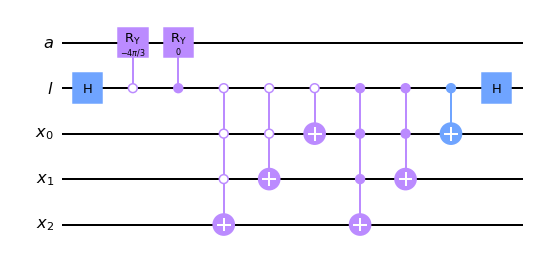

In [3]:
beta = 1.0
gamma = - 0.5

qc = block_encoding(beta, gamma, i=0, j=0, add_measurements=False)
qc.draw("mpl", fold=-1)

### Check $\langle 0^{\otimes 2} | \langle j | U_A | 0^{\otimes 2} \rangle | i \rangle = A_{ij} / 2$

In [4]:
for i in range(8):
    probabilities = run_block_encoding(beta, gamma, i, 0)
    print(abs_amplitudes(filter_probabilities(probabilities, 2)))

{'00100': 0.4999999999999999, '01100': 3.925231146709437e-17, '10100': 1.415262216750919e-16, '11100': 0.24999999999999983}
{'00000': 0.2499999999999999, '01000': 0.4999999999999998, '10000': 7.850462293418875e-17}
{'00100': 0.2500000000000001, '01100': 0.49999999999999956, '10100': 3.925231146709437e-17, '11100': 2.0014830212433607e-16}
{'00000': 1.7554167342883506e-16, '01000': 0.25, '10000': 0.4999999999999998, '11000': 3.925231146709437e-17}
{'00100': 1.7554167342883506e-16, '01100': 0.2500000000000001, '10100': 0.5, '11100': 6.206335383118183e-17}
{'00000': 1.316562550716263e-16, '01000': 1.570092458683775e-16, '10000': 0.25000000000000006, '11000': 0.4999999999999998}
{'00100': 6.206335383118183e-17, '01100': 2.4825341532472726e-16, '10100': 0.2500000000000001, '11100': 0.4999999999999997}
{'00000': 0.49999999999999967, '01000': 5.551115123125783e-17, '10000': 1.9626155733547187e-16, '11000': 0.24999999999999994}


## Banded circulant Hermitian matrix ($s > 2$)
Block encoding of $A / s$, where $A^{\dagger} = A$ and $s = 2$

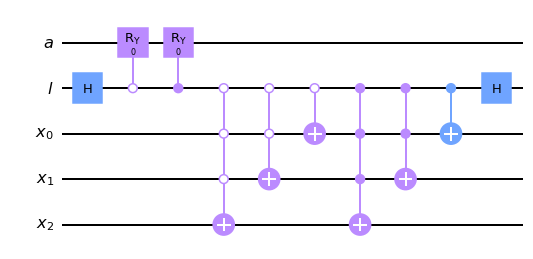

In [4]:
beta = 1.0
gamma = 1.0

# signal operator
u = block_encoding(beta, gamma, i=0, j=0, add_measurements=False)
u.draw("mpl", fold=-1)

### Signal oracle $U^{\prime} = SU$

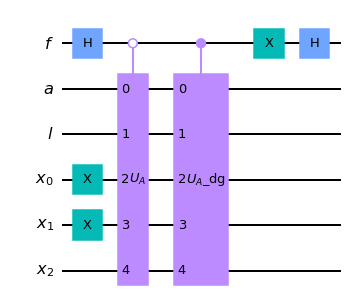

In [5]:
# signal operator
u = signal_oracle(beta, gamma, i=3, j=0, add_measurements=False)
u.draw("mpl", fold=-1)

In [8]:
def run_signal_oracle(beta, gamma, i, j):
    qc = signal_oracle(beta, gamma, i=i, j=j, add_measurements=False)
    tqc = transpile(qc, basis_gates=["sx", "rz", "cx"])
    backend = Aer.get_backend("aer_simulator_statevector")
    backend.set_options(precision="double")
    tqc.save_statevector()
    job = backend.run(tqc)
    result = job.result()
    sv = result.get_statevector(0)
    return sv.probabilities_dict()

In [9]:
for i in range(8):
    probabilities = run_signal_oracle(beta, gamma, i, 0)
    print(abs_amplitudes(filter_probabilities(probabilities, 3)))

{'000000': 1.2836293000302095e-15, '001000': 0.4999999999999985, '010000': 1.2455598663633154e-15, '011000': 4.6910207358919825e-15, '100000': 1.9840805665695077e-16, '101000': 2.8420679419676207e-15, '110000': 1.1501979632042873e-15, '111000': 0.49999999999999845}
{'000000': 0.5, '001000': 2.0765098260003785e-15, '010000': 0.5000000000000002, '011000': 8.017073762939156e-16, '100000': 2.878194307164271e-15, '101000': 4.535945609866729e-17, '110000': 9.582710459383785e-16, '111000': 5.841870208136088e-16}
{'000000': 1.1944641969002824e-15, '001000': 0.499999999999999, '010000': 1.253161536138637e-15, '011000': 0.4999999999999998, '100000': 9.117253268936312e-16, '101000': 6.101493737192989e-16, '110000': 6.17289034285954e-17, '111000': 1.6441518390774997e-15}
{'000000': 4.493489683637404e-15, '001000': 7.963905165635742e-16, '010000': 0.4999999999999988, '011000': 2.120156424126004e-15, '100000': 0.4999999999999992, '101000': 6.214879348306777e-16, '110000': 1.7235296186091125e-15, '11

### $\langle 0^{\otimes 4} | SUSU | 0^{\otimes 4} \rangle= I$

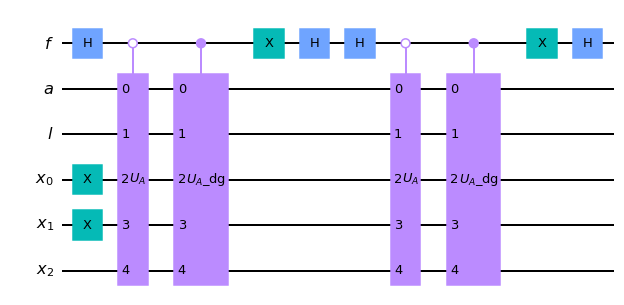

In [10]:
u = signal_oracle(beta, gamma, i=3, j=0, add_measurements=False, rep=2)
u.draw("mpl", fold=-1)

In [11]:
def run_signal_oracle_twice(beta, gamma, i, j):
    qc = signal_oracle(beta, gamma, i=i, j=j, add_measurements=False, rep=2)
    tqc = transpile(qc, basis_gates=["sx", "rz", "cx"])
    backend = Aer.get_backend("aer_simulator_statevector")
    backend.set_options(precision="double")
    tqc.save_statevector()
    job = backend.run(tqc)
    result = job.result()
    sv = result.get_statevector(0)
    return sv.probabilities_dict()

In [12]:
for i in range(8):
    probabilities = run_signal_oracle_twice(beta, gamma, i, 0)
    print(abs_amplitudes(filter_probabilities(probabilities, 3)))

{'000000': 0.9999999999999959, '001000': 3.4224101975799667e-15, '010000': 5.040710916574552e-15, '011000': 1.7243931923881963e-16, '100000': 8.993191985307418e-15, '101000': 2.503810583683138e-16, '110000': 1.812759173404855e-15, '111000': 3.3606283677033556e-15}
{'000000': 3.281319046120493e-15, '001000': 0.9999999999999949, '010000': 3.1806765619431013e-15, '011000': 6.000815528928464e-15, '100000': 1.258664829179487e-16, '101000': 5.372622044635016e-15, '110000': 8.33687366573471e-17, '111000': 1.0867271148709573e-15}
{'000000': 5.537591545038563e-15, '001000': 3.749249653724569e-15, '010000': 0.9999999999999959, '011000': 3.4233309201169847e-15, '100000': 1.9947648250817256e-15, '101000': 3.9616090211910906e-16, '110000': 3.666363408044155e-15, '111000': 1.0652997521059297e-16}
{'000000': 4.3991065846547164e-16, '001000': 6.965681977154097e-15, '010000': 3.1816001065520174e-15, '011000': 0.9999999999999964, '100000': 3.0785880809995366e-15, '101000': 9.965690033784352e-16, '110000

### Unitary iterate $W = (2 | 0^{\otimes 3} \rangle \langle 0^{\otimes 3}| - I) S U_A$

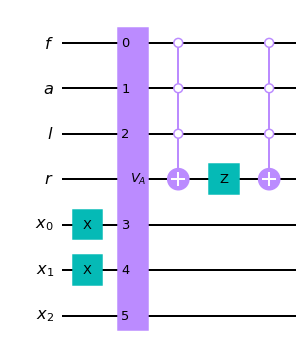

In [13]:
w = unitary_iterate(beta, gamma, i=3, j=0, add_measurements=False)
w.draw("mpl", fold=-1)

### Check $\langle 0^{\otimes 4} | \langle j | W_A | 0^{\otimes 4} \rangle | i \rangle = A_{ij} / 2$

In [16]:
def run_unitary_iterate(beta, gamma, i, j):
    qc = unitary_iterate(beta, gamma, i=i, j=j, add_measurements=False)
    tqc = transpile(qc, basis_gates=["sx", "rz", "cx"])
    backend = Aer.get_backend("aer_simulator_statevector")
    backend.set_options(precision="double")
    tqc.save_statevector()
    job = backend.run(tqc)
    result = job.result()
    sv = result.get_statevector(0)
    return sv.probabilities_dict()

In [17]:
for i in range(8):
    probabilities = run_unitary_iterate(beta, gamma, i, 0)
    print(abs_amplitudes(filter_probabilities(probabilities, 4)))

{'0000000': 1.3443612803228121e-15, '0010000': 0.49999999999999867, '0100000': 1.1761047426544927e-15, '0110000': 4.2342492886330696e-15, '1000000': 2.3762298315310614e-16, '1010000': 2.9545350688281138e-15, '1100000': 1.0558924925758778e-15, '1110000': 0.49999999999999867}
{'0000000': 0.4999999999999991, '0010000': 2.2023264047490743e-15, '0100000': 0.4999999999999992, '0110000': 6.77308682849213e-16, '1000000': 2.8882140447211378e-15, '1010000': 1.0237642681461126e-16, '1100000': 8.658894429140194e-16, '1110000': 7.740961247722306e-16}
{'0000000': 1.1367376063654769e-15, '0010000': 0.49999999999999917, '0100000': 1.2821818188531113e-15, '0110000': 0.4999999999999991, '1000000': 9.877201225976468e-16, '1010000': 1.0054454872387961e-15, '1100000': 6.194958044265313e-17, '1110000': 1.5406844766068322e-15}
{'0000000': 4.063917697506171e-15, '0010000': 7.656972386717697e-16, '0100000': 0.4999999999999991, '0110000': 1.9959707137527027e-15, '1000000': 0.49999999999999845, '1010000': 6.0659